In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Define the file path
file_path = r'C:\Users\Ankit\OneDrive\Documents\CareerFoundry\Final Projects\WHO MORTALITY\Data\Cleaned Data\cleaned_life_expectancy_data.csv'

# Use Pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the import
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,total_vaccinations
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5,356
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8,385
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4,226
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0,352
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7,374


In [3]:
%matplotlib inline

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [5]:
# Specify the numeric columns of interest
numeric_columns_of_interest = ['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed', 'Economy_status_Developing', 'Life_expectancy', 'total_vaccinations']

# Calculate the count of unique values for each specified numeric column
unique_counts = df[numeric_columns_of_interest].nunique()

# Print the unique value counts for each specified numeric column
print(unique_counts)


Year                             16
Infant_deaths                   847
Under_five_deaths              1035
Adult_mortality                2850
Alcohol_consumption            1164
Hepatitis_B                      80
Measles                          87
BMI                             120
Polio                            77
Diphtheria                       80
Incidents_HIV                   393
GDP_per_capita                 2564
Population_mln                 1803
Thinness_ten_nineteen_years     200
Thinness_five_nine_years        207
Schooling                       130
Economy_status_Developed          2
Economy_status_Developing         2
Life_expectancy                 396
total_vaccinations              238
dtype: int64


In [7]:
# Select the desired columns
columns_to_include = ['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed', 'Economy_status_Developing', 'Life_expectancy', 'total_vaccinations']
data_to_plot = df[columns_to_include]


In [8]:
data_to_plot.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,total_vaccinations
0,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5,356
1,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8,385
2,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4,226
3,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0,352
4,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7,374


In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(data_to_plot).score(data_to_plot) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\clust

[-821182816358.6265,
 -192003750769.66022,
 -107749318336.74112,
 -57002121131.072784,
 -37725221554.12033,
 -26389242534.361984,
 -18320607310.336746,
 -13834174533.94651,
 -9815905033.898909]

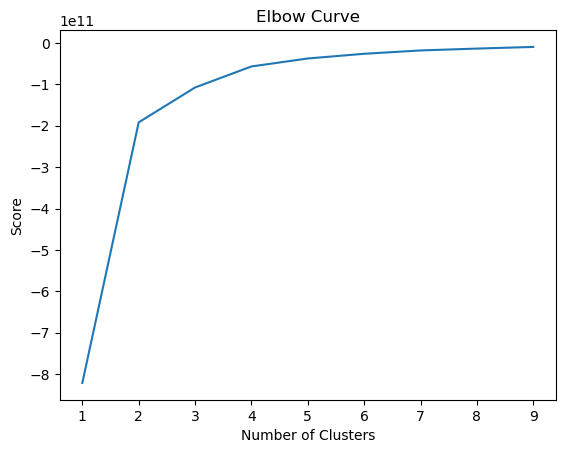

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 


In [13]:
# Fit the k-means object to the data.

kmeans.fit(data_to_plot)

C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [14]:
data_to_plot['clusters'] = kmeans.fit_predict(data_to_plot)

C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ankit\AppData\Local\Temp\ipykernel_18736\2049843680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot['clusters'] = kmeans.fit_predict(data_to_plot)


In [15]:
data_to_plot.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,total_vaccinations,clusters
0,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,...,11006,78.53,4.9,4.8,7.8,0,1,76.5,356,1
1,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,...,25742,46.44,0.6,0.5,9.7,1,0,82.8,385,0
2,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,...,1076,1183.21,27.1,28.0,5.0,0,1,65.4,226,1
3,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,...,4146,0.75,5.7,5.5,7.9,0,1,67.0,352,1
4,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,...,33995,7.91,1.2,1.1,12.8,1,0,81.7,374,0


In [16]:
data_to_plot['clusters'].value_counts()

1    2418
0     446
Name: clusters, dtype: int64

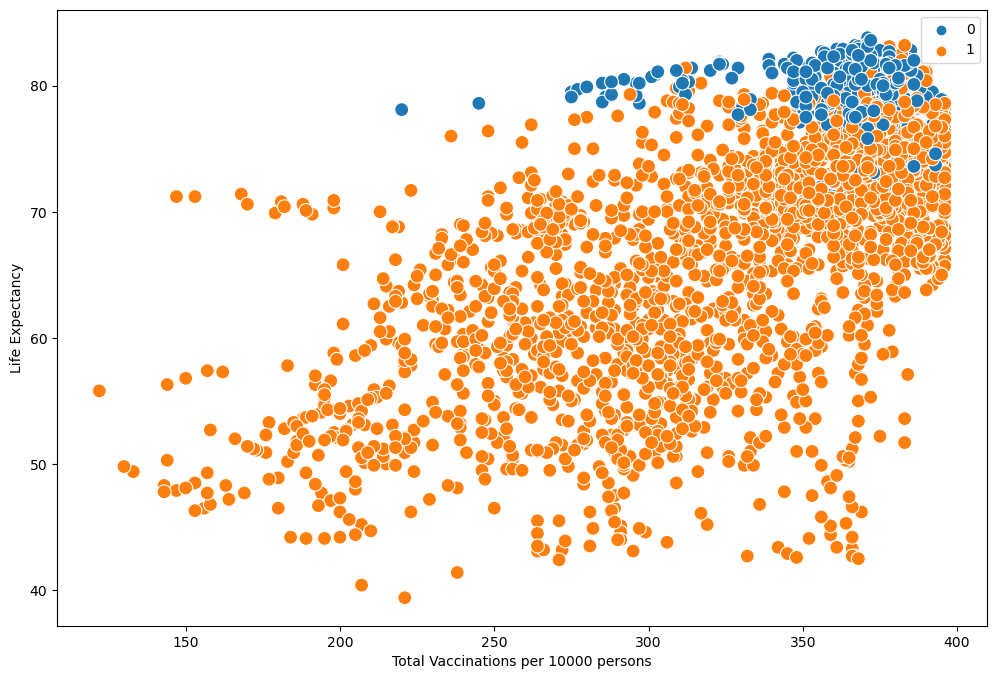

In [17]:
#It seems like the pink group is seen in under a littl bit less than forty, the black one in the older ones and the purple one is found in all the age ranges
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_to_plot['total_vaccinations'], y=data_to_plot['Life_expectancy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Vaccinations per 10000 persons') # Label x-axis.
plt.ylabel('Life Expectancy') # Label y-axis.
plt.show()

In [18]:
data_to_plot.loc[data_to_plot['clusters'] == 1, 'cluster'] = 'orange'
data_to_plot.loc[data_to_plot['clusters'] == 0, 'cluster'] = 'blue'

data_to_plot.groupby('cluster').agg({
   'Year': ['mean', 'median'],
    'Infant_deaths': ['mean', 'median'],
    'Under_five_deaths': ['mean', 'median'],
    'Adult_mortality': ['mean', 'median'],
    'Alcohol_consumption': ['mean', 'median'],
    'Hepatitis_B': ['mean', 'median'],
    'Measles': ['mean', 'median'],
    'BMI': ['mean', 'median'],
    'Polio': ['mean', 'median'],
    'Diphtheria': ['mean', 'median'],
    'Incidents_HIV': ['mean', 'median'],
    'GDP_per_capita': ['mean', 'median'],
    'Population_mln': ['mean', 'median'],
    'Thinness_ten_nineteen_years': ['mean', 'median'],
    'Thinness_five_nine_years': ['mean', 'median'],
    'Schooling': ['mean', 'median'],
    'Economy_status_Developed': ['mean', 'median'],
    'Economy_status_Developing': ['mean', 'median'],
    'Life_expectancy': ['mean', 'median'],
    'total_vaccinations': ['mean', 'median']
})



Year         Infant_deaths        Under_five_deaths         \
                mean  median          mean median              mean median   
cluster                                                                      
blue     2007.508969  2007.5      4.798206    3.9          5.755605    4.7   
orange   2007.498346  2007.5     35.079363   25.0         49.796609   30.0   

        Adult_mortality            Alcohol_consumption         ...  Schooling  \
                   mean     median                mean median  ...       mean   
cluster                                                        ...              
blue          78.298278   73.01075            7.958067  9.120  ...  11.162780   
orange       213.270493  181.54000            4.242228  3.415  ...   6.980893   

               Economy_status_Developed        Economy_status_Developing  \
        median                     mean median                      mean   
cluster                                                                    
blue      11.6                 0.784753    1.0                  0.215247   
orange     7.1                 0.100083    0.0                  0.899917   

               Life_expectancy        total_vaccinations         
        median            mean median               mean median  
cluster                                                          
blue       0.0       79.349776   80.0         363.260090  369.0  
orange     1.0       66.920513   69.7         329.087262  347.0  

[2 rows x 40 columns]

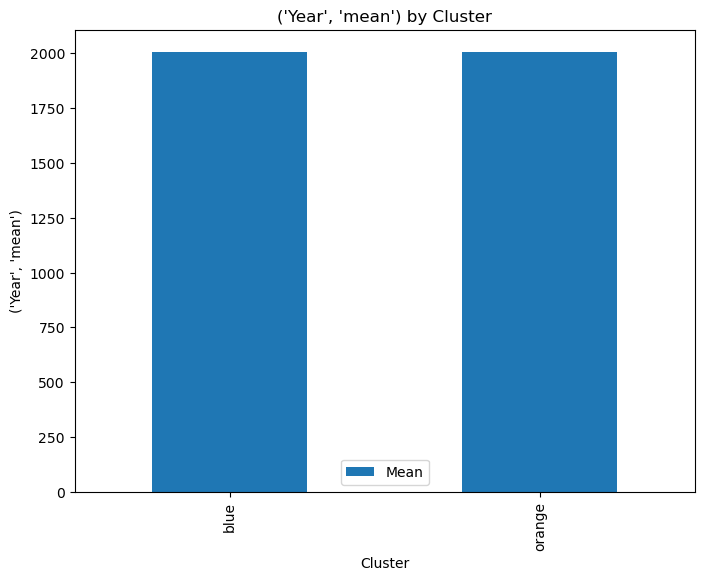

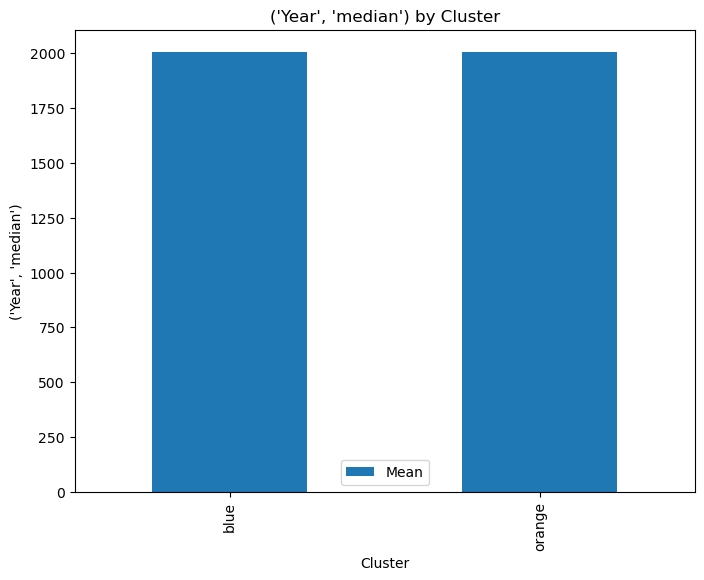

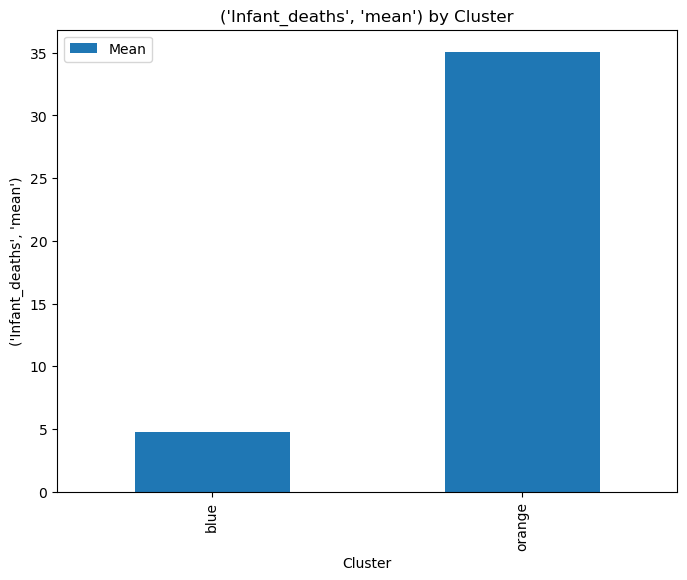

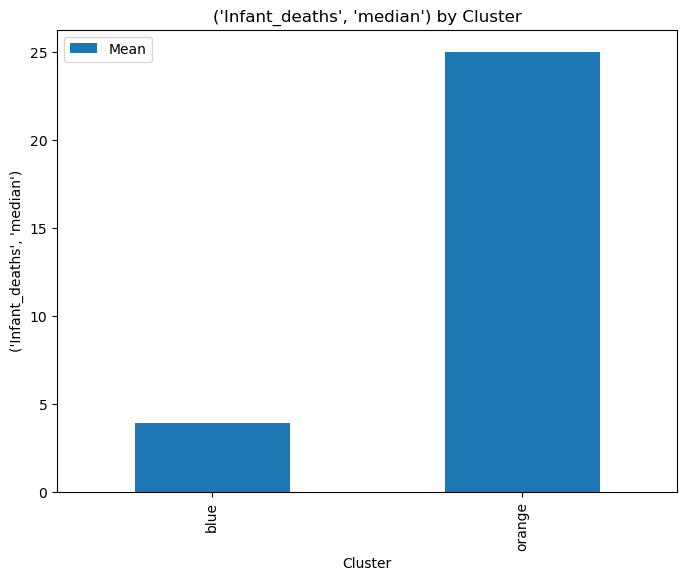

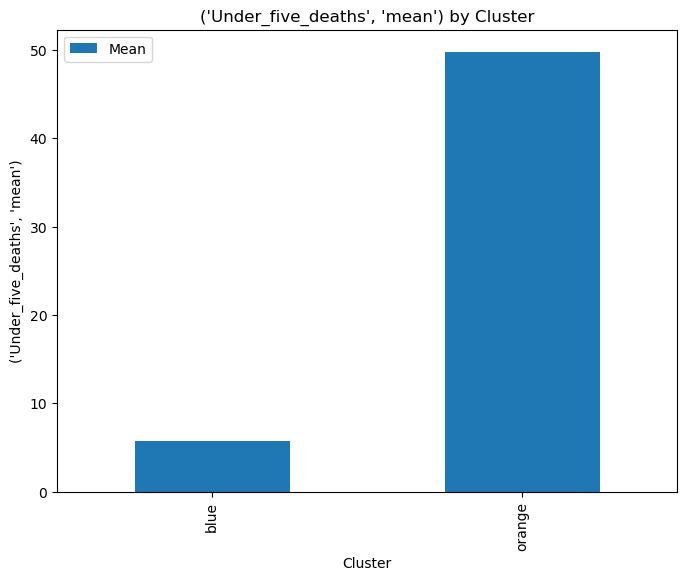

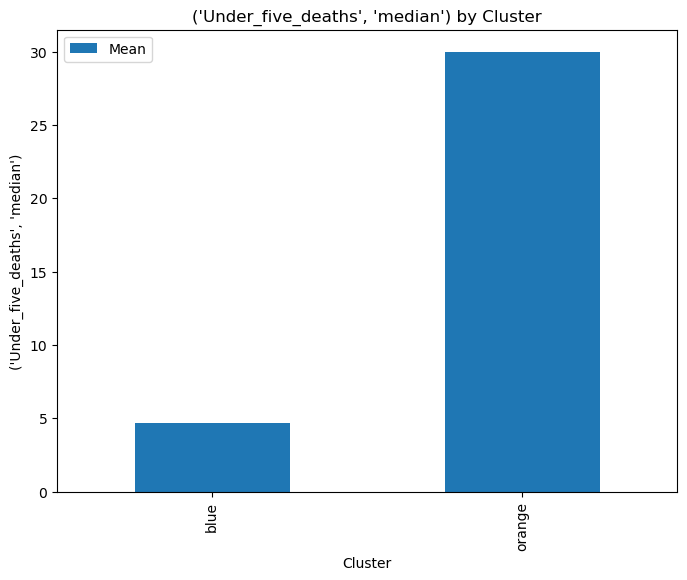

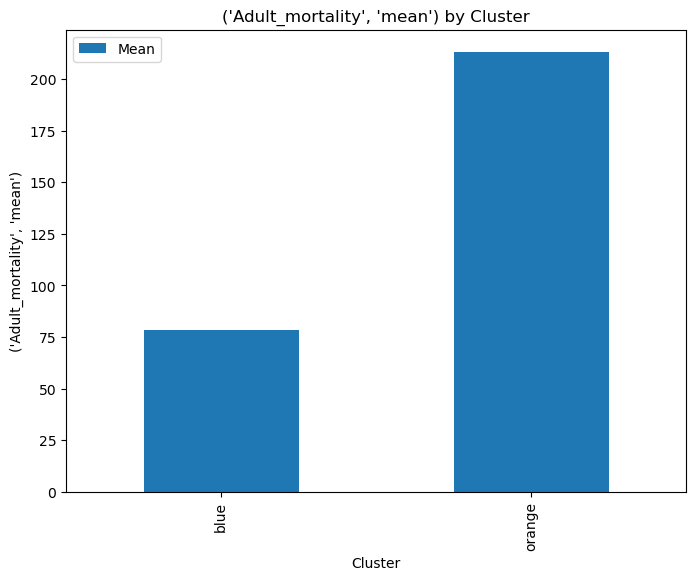

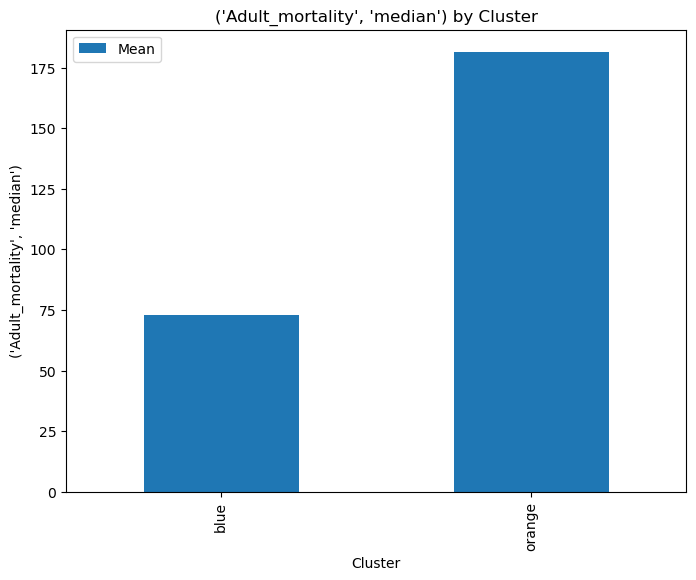

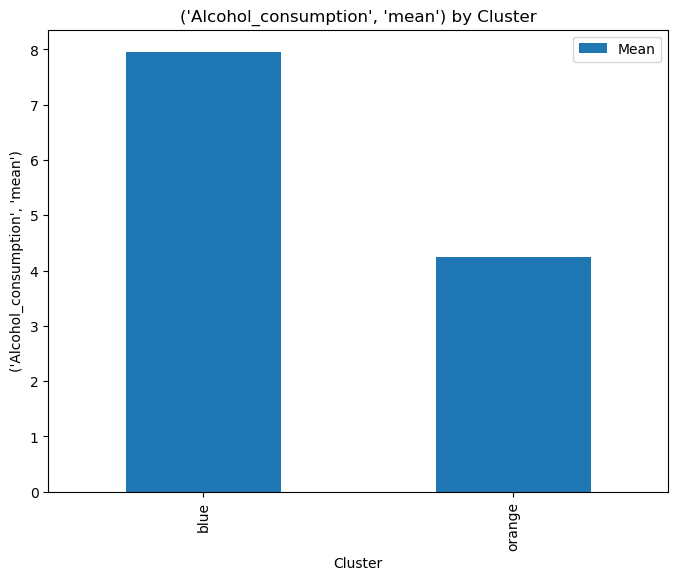

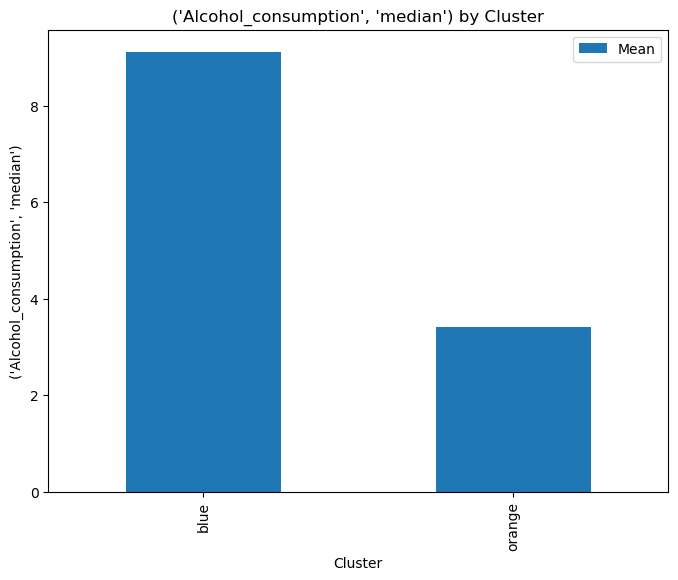

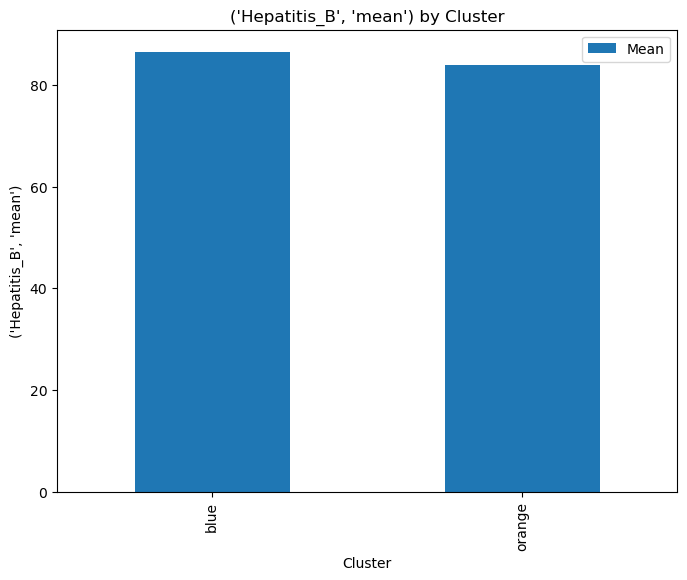

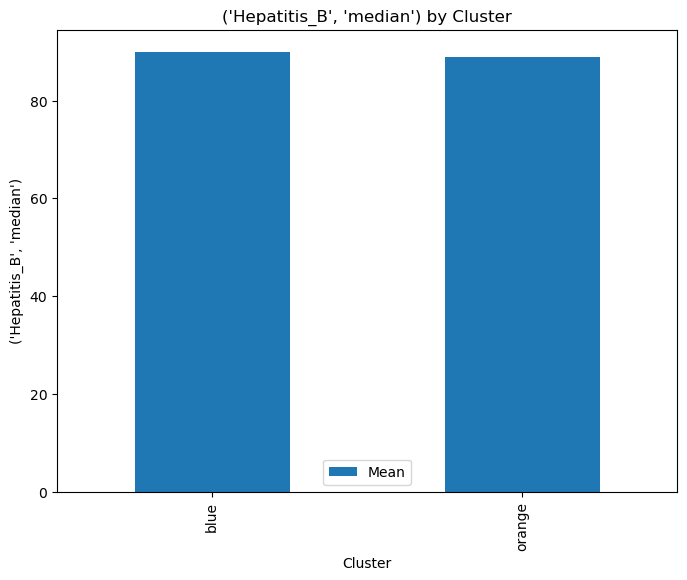

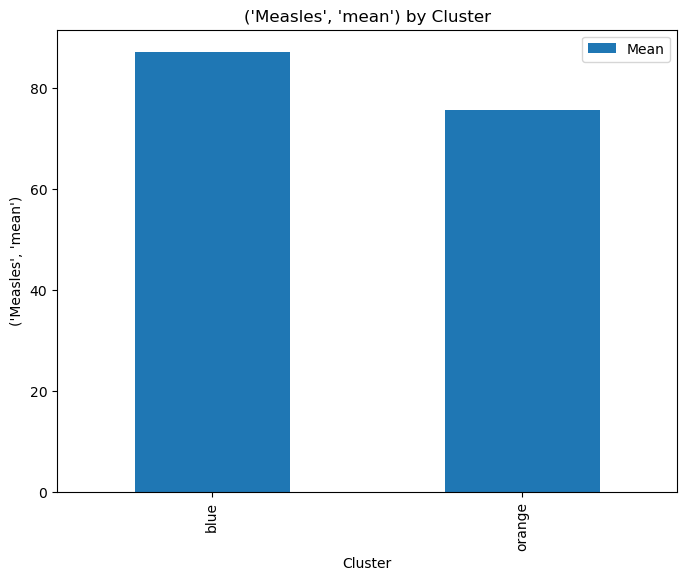

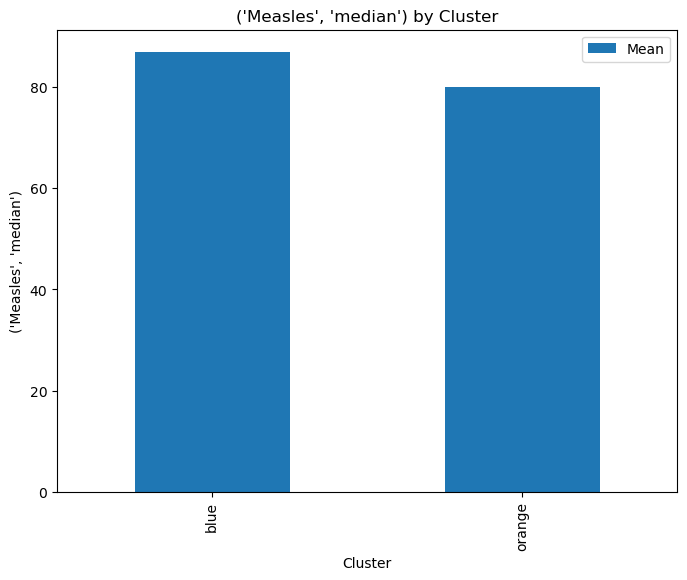

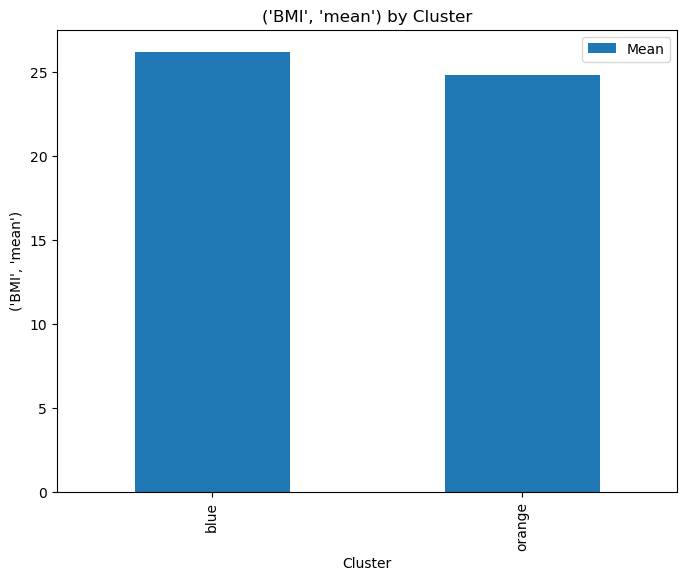

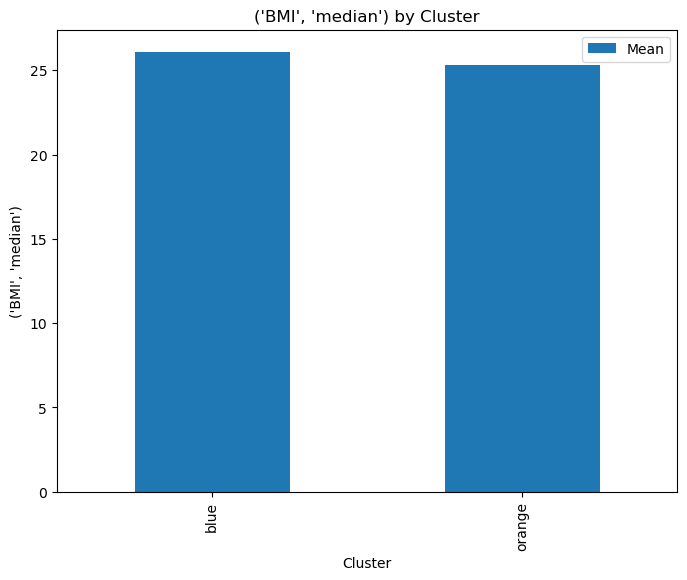

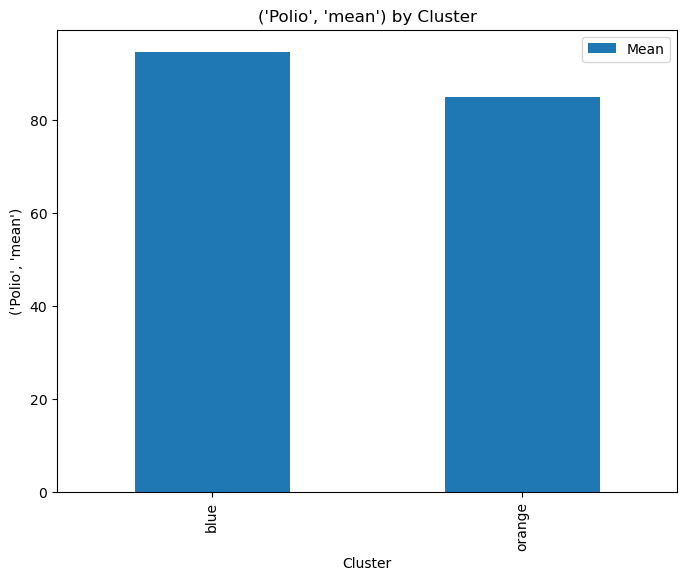

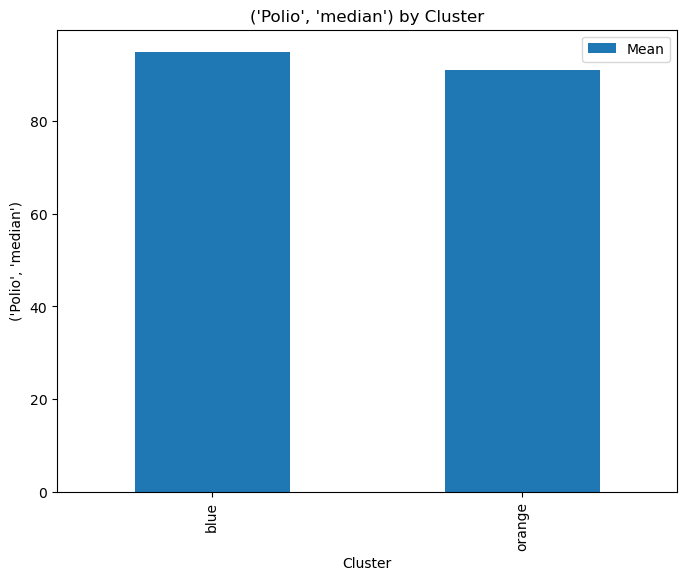

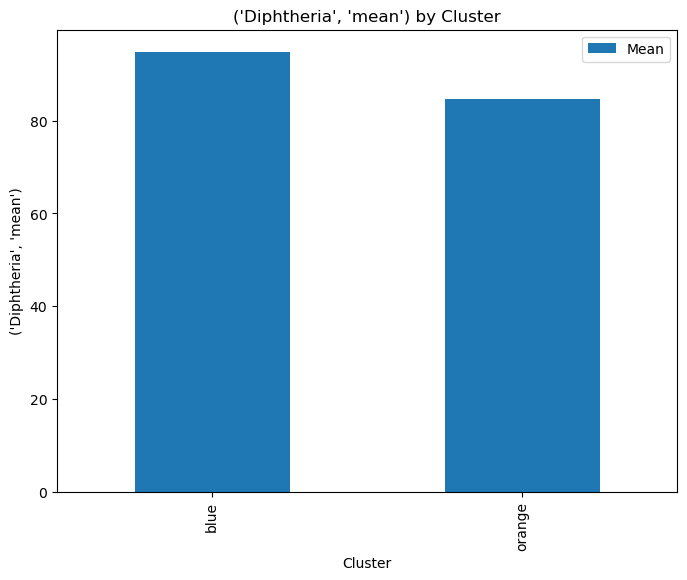

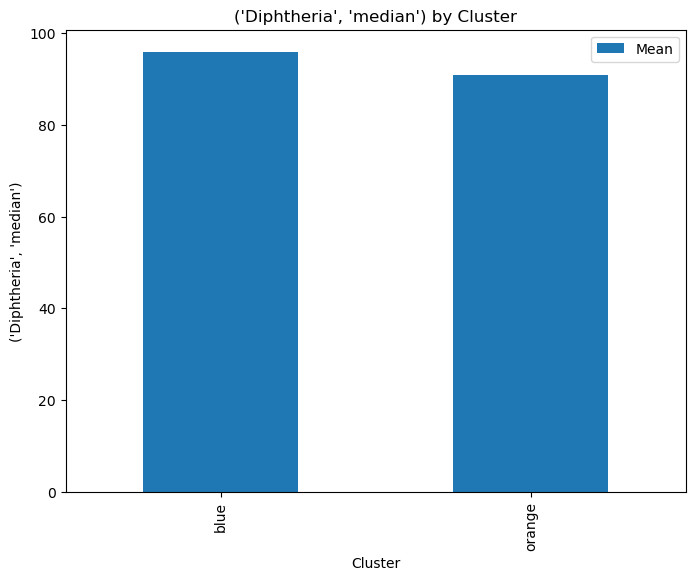

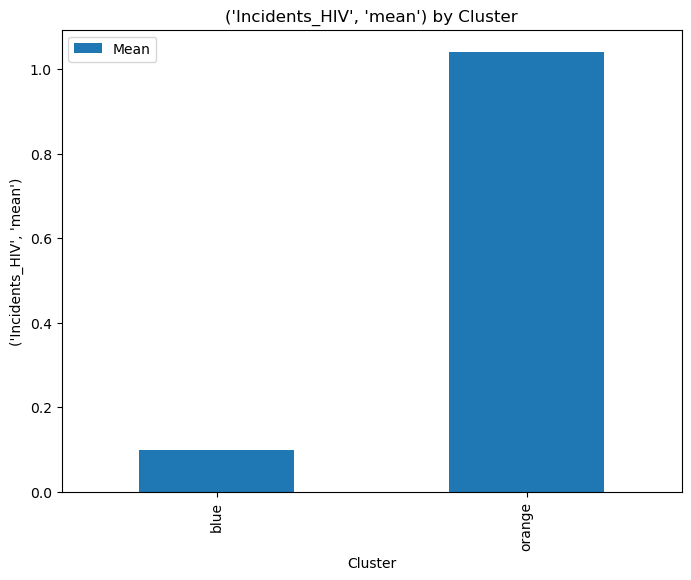

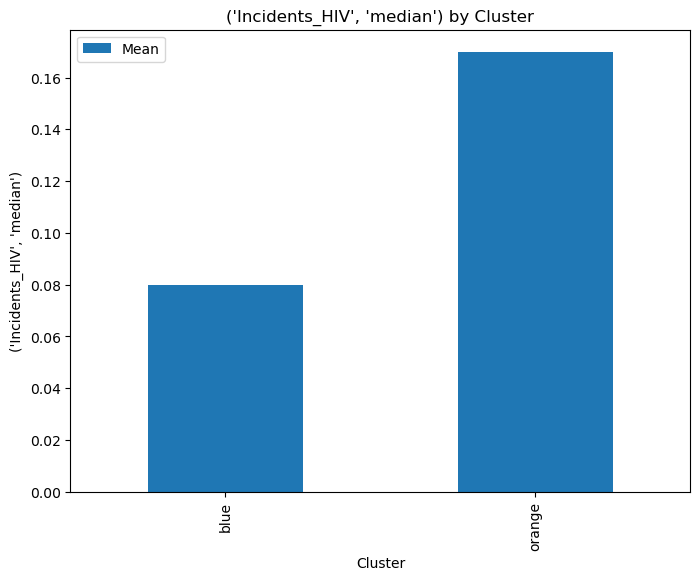

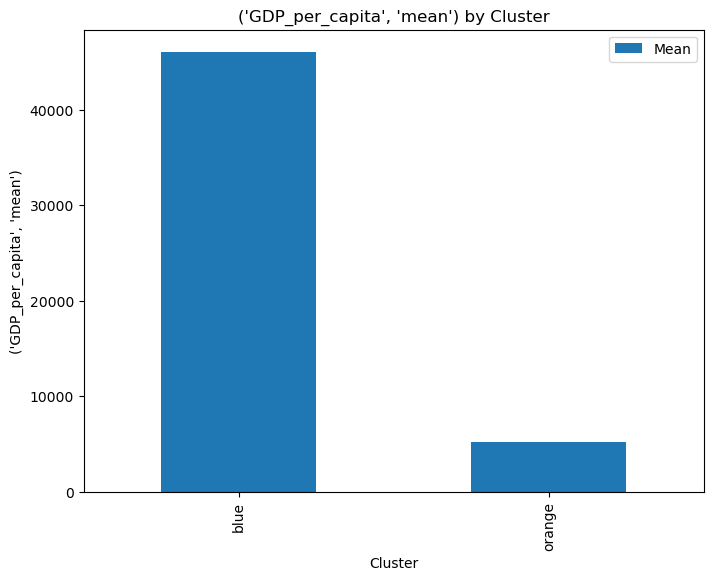

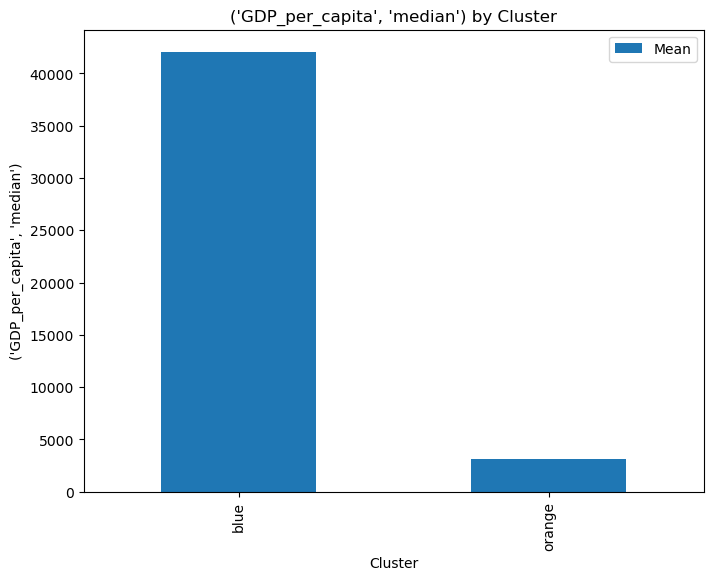

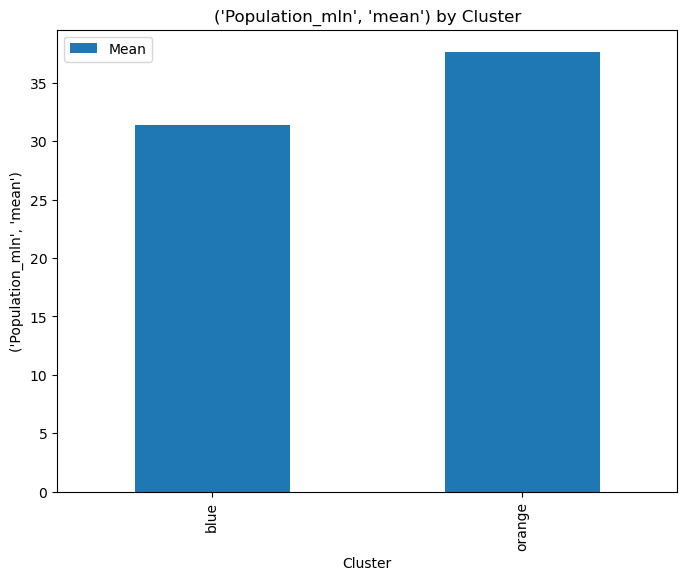

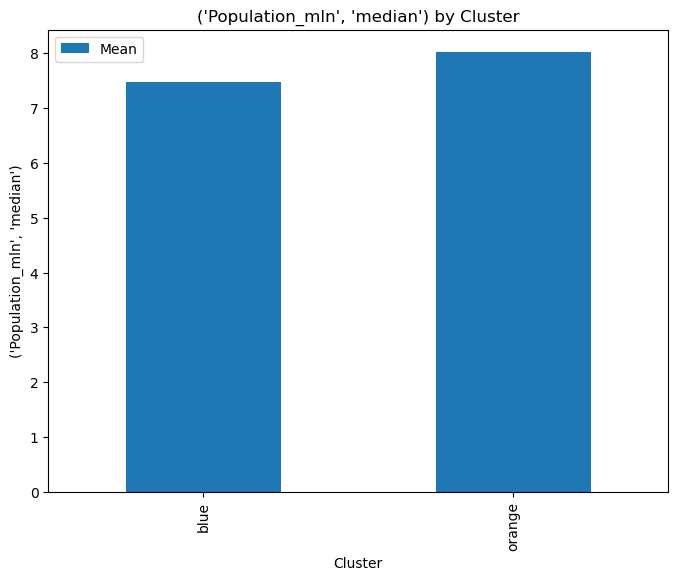

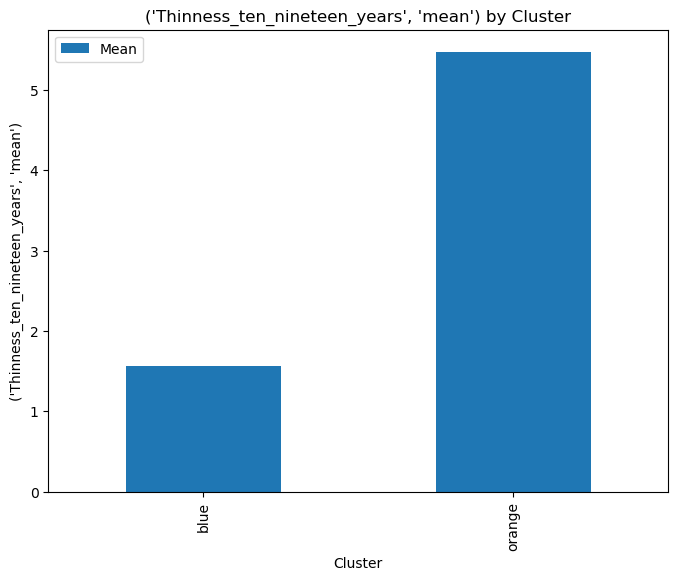

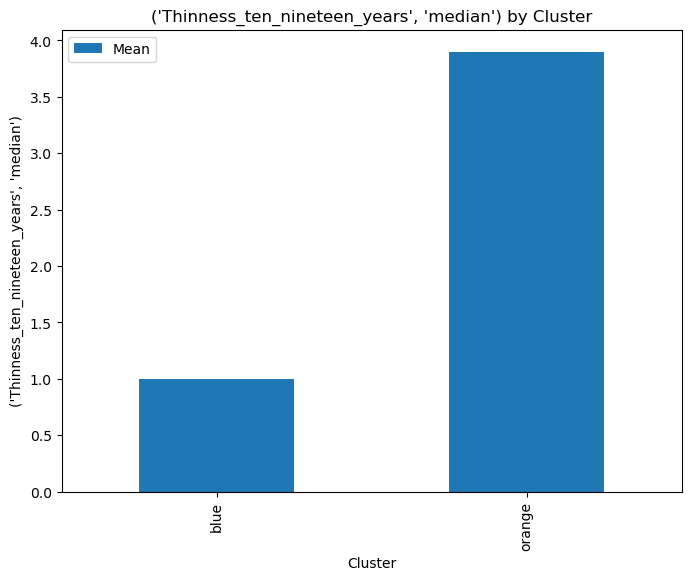

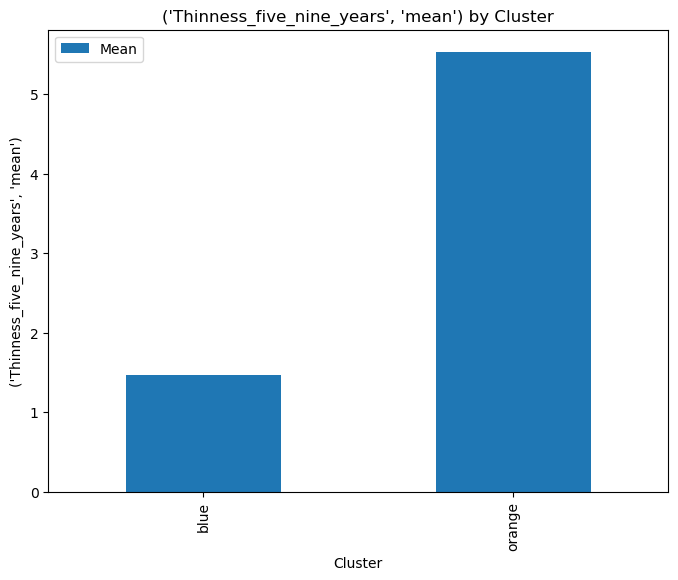

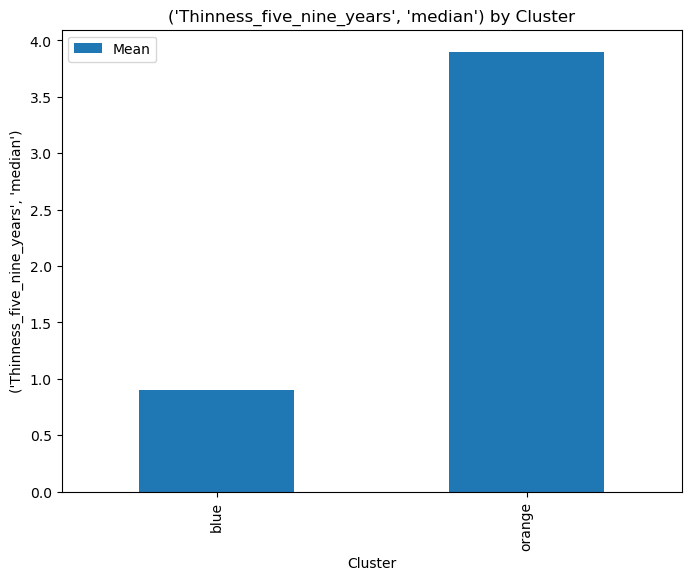

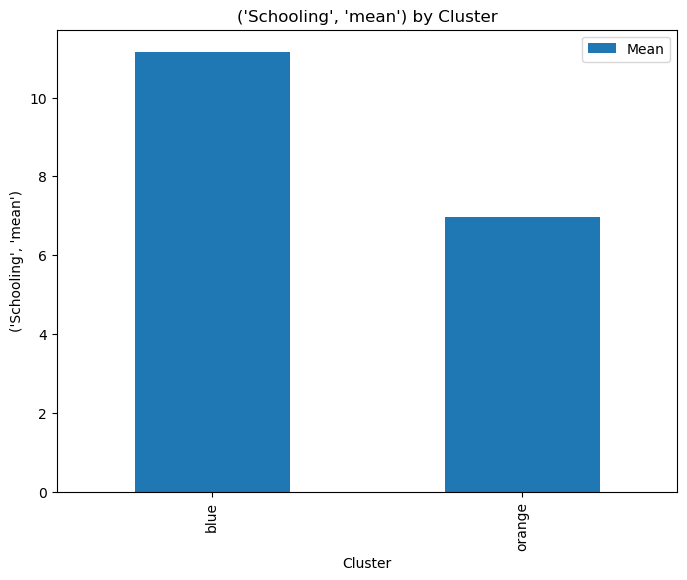

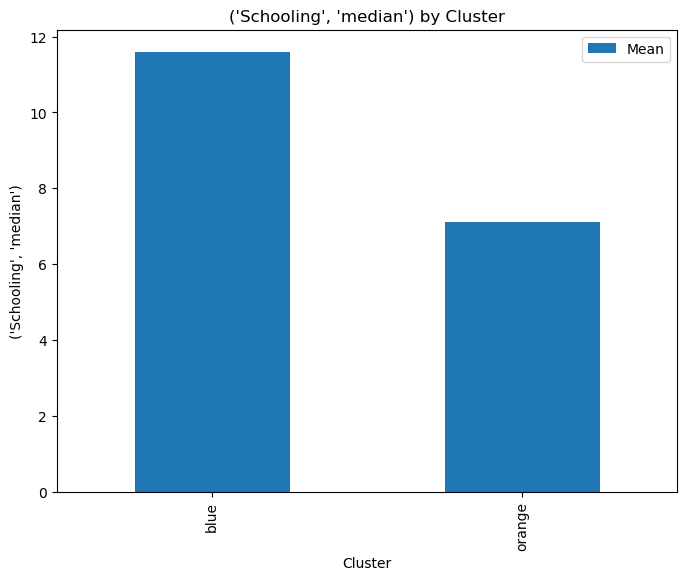

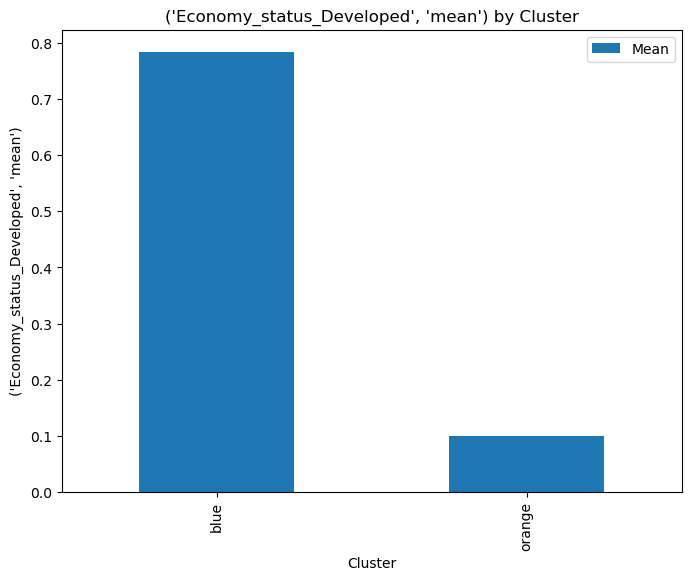

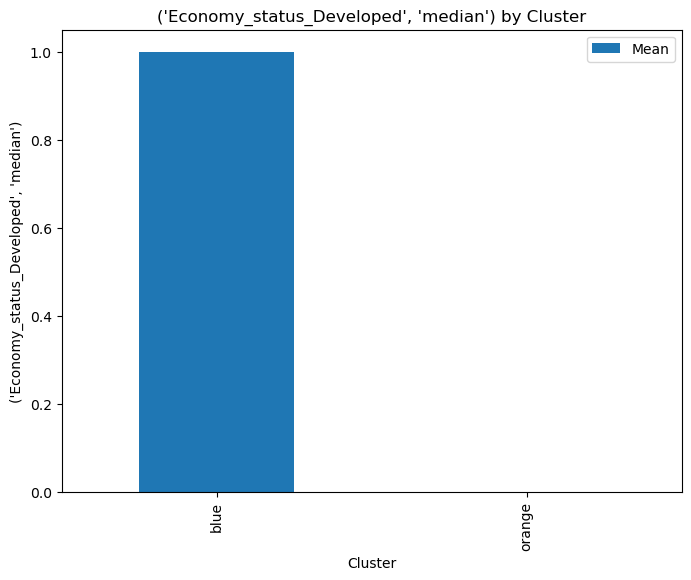

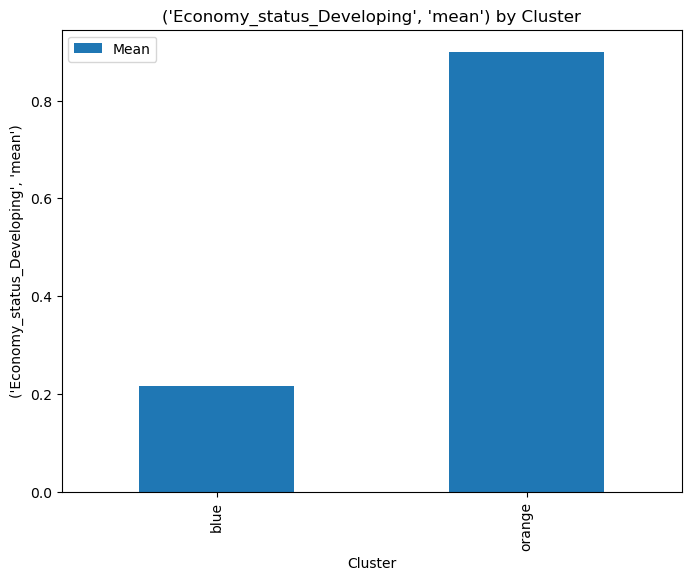

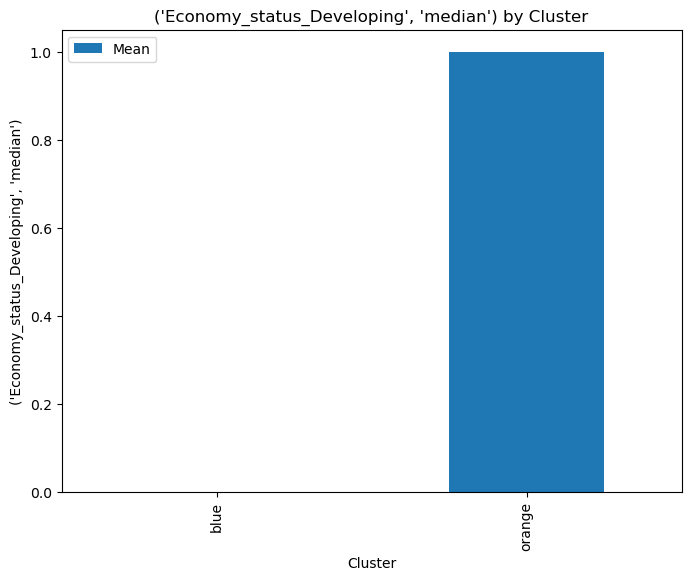

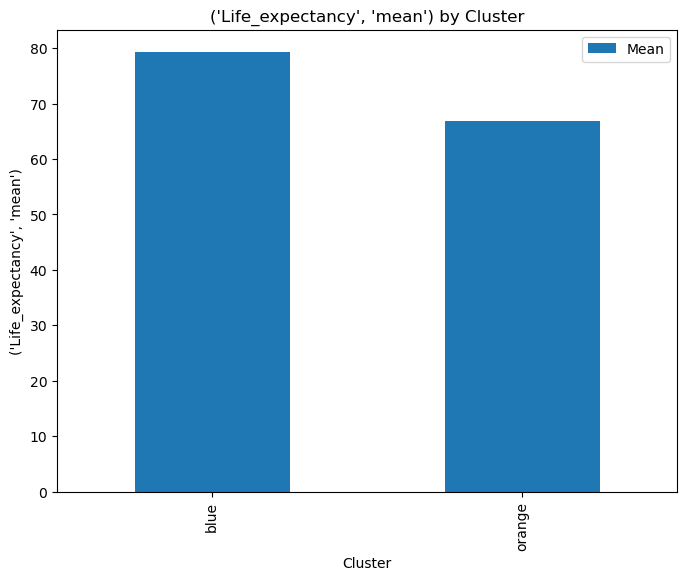

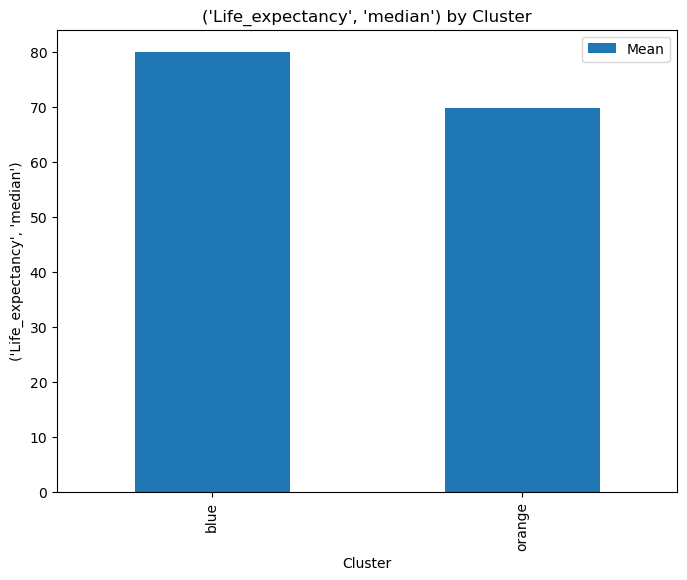

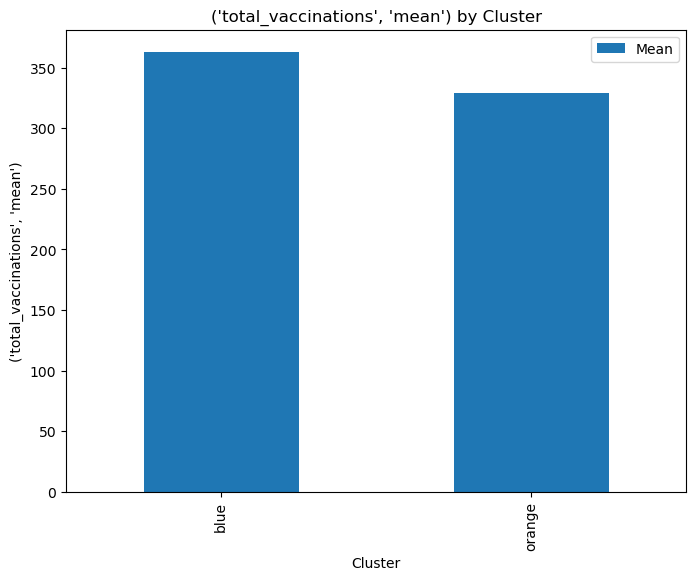

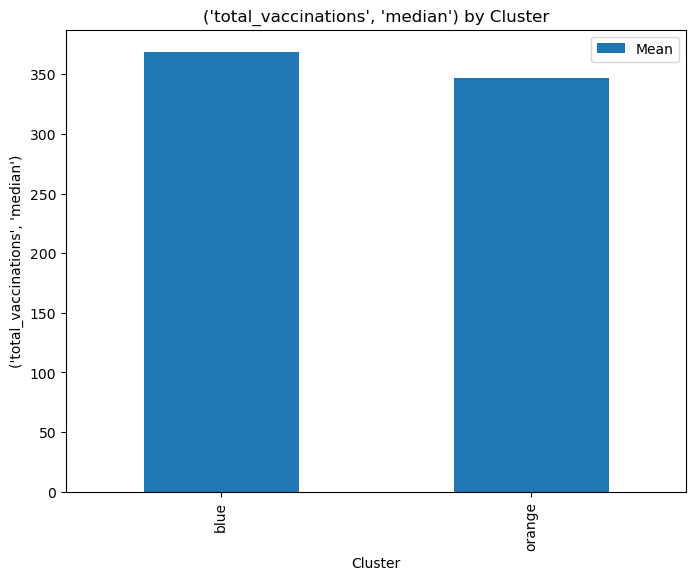

In [19]:
import matplotlib.pyplot as plt

# Grouped data
grouped_data = data_to_plot.groupby('cluster').agg({
   'Year': ['mean', 'median'],
    'Infant_deaths': ['mean', 'median'],
    'Under_five_deaths': ['mean', 'median'],
    'Adult_mortality': ['mean', 'median'],
    'Alcohol_consumption': ['mean', 'median'],
    'Hepatitis_B': ['mean', 'median'],
    'Measles': ['mean', 'median'],
    'BMI': ['mean', 'median'],
    'Polio': ['mean', 'median'],
    'Diphtheria': ['mean', 'median'],
    'Incidents_HIV': ['mean', 'median'],
    'GDP_per_capita': ['mean', 'median'],
    'Population_mln': ['mean', 'median'],
    'Thinness_ten_nineteen_years': ['mean', 'median'],
    'Thinness_five_nine_years': ['mean', 'median'],
    'Schooling': ['mean', 'median'],
    'Economy_status_Developed': ['mean', 'median'],
    'Economy_status_Developing': ['mean', 'median'],
    'Life_expectancy': ['mean', 'median'],
    'total_vaccinations': ['mean', 'median']
})

# Create bar graphs for each cluster
for column in grouped_data.columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    grouped_data[column].plot(kind='bar', ax=ax)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(column)
    ax.set_title(f'{column} by Cluster')
    ax.legend(['Mean', 'Median'])
    plt.show()


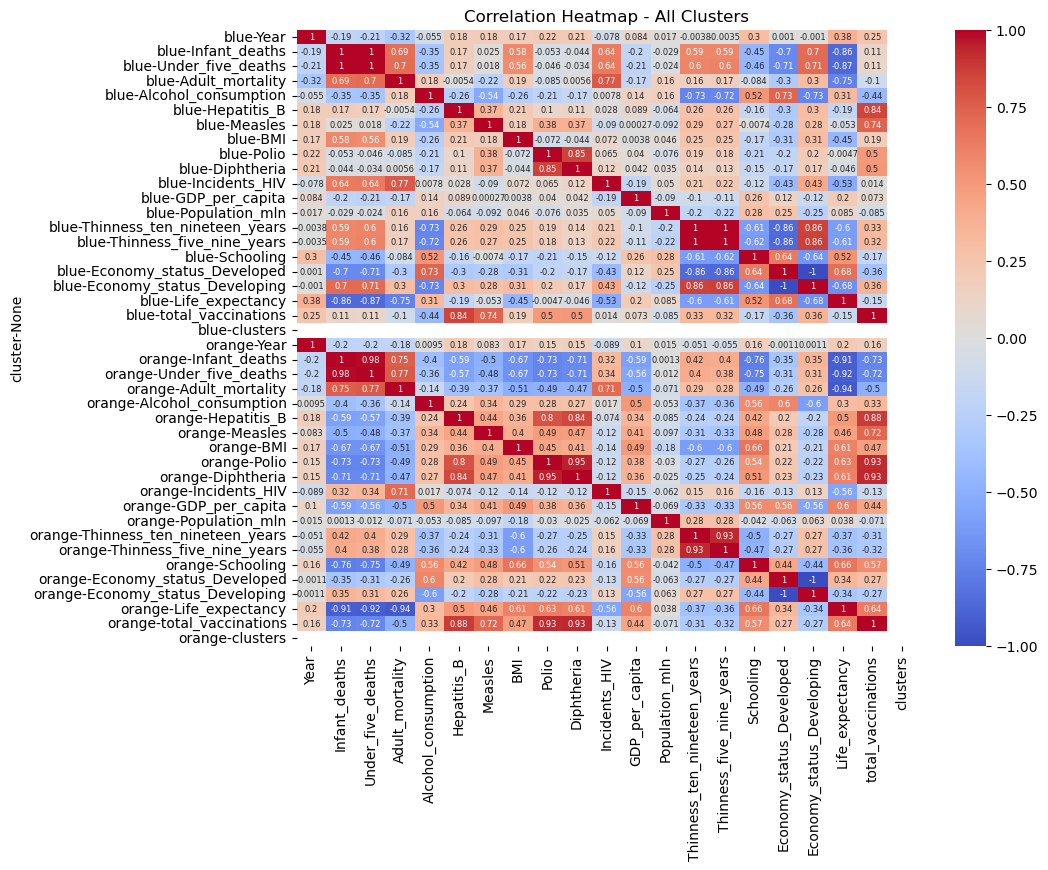

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data_to_plot.groupby('cluster').corr()

# Create a heatmap with smaller font size for the annotations
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set smaller font size for the annotations
annot_font_size = 6  # You can adjust this to your preferred size
for text in heatmap.texts:
    text.set_fontsize(annot_font_size)

plt.title('Correlation Heatmap - All Clusters')
plt.show()


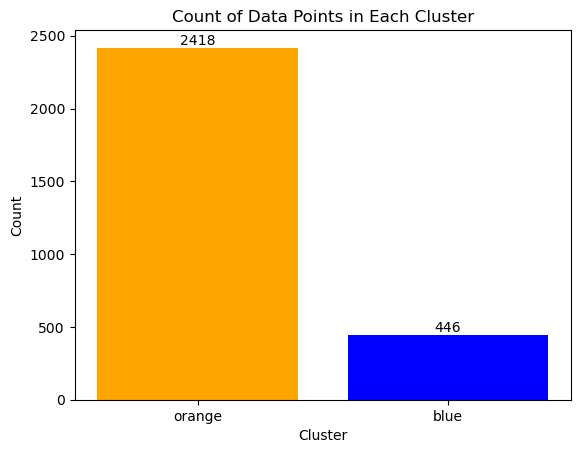

In [24]:
import matplotlib.pyplot as plt

# Calculate value count for each cluster
cluster_counts = data_to_plot['clusters'].value_counts()

# Create a dictionary mapping cluster labels to their names
cluster_names = {
     1: 'orange',
    0: 'blue'
}

# Create a list of colors for the bars
colors = ['orange', 'blue']

# Create bar graphs for each cluster
for cluster_label, count in cluster_counts.items():
    # Get the cluster name corresponding to the cluster label
    cluster_name = cluster_names[cluster_label]
    
    # Get the index of the current cluster label in the cluster_names dictionary
    cluster_index = list(cluster_names.keys()).index(cluster_label)
    
    # Create a bar graph for the current cluster with the corresponding color
    plt.bar(cluster_name, count, color=colors[cluster_index])
    
    # Add count value as annotation on top of the bar
    plt.text(cluster_name, count, str(count), ha='center', va='bottom')

# Set the x-axis label
plt.xlabel('Cluster')

# Set the y-axis label
plt.ylabel('Count')

# Set the title of the graph
plt.title('Count of Data Points in Each Cluster')

# Display the graph
plt.show()


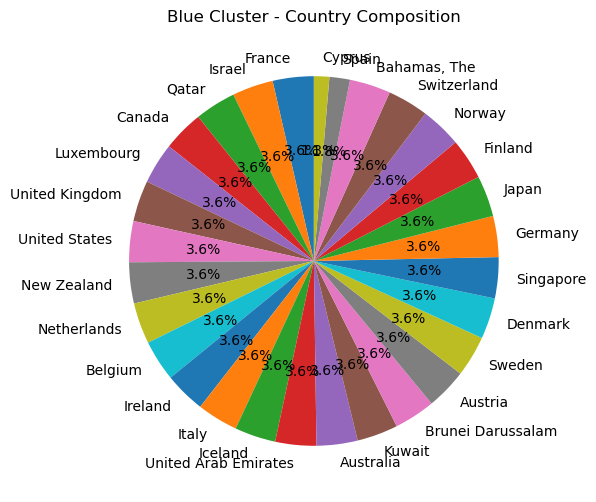

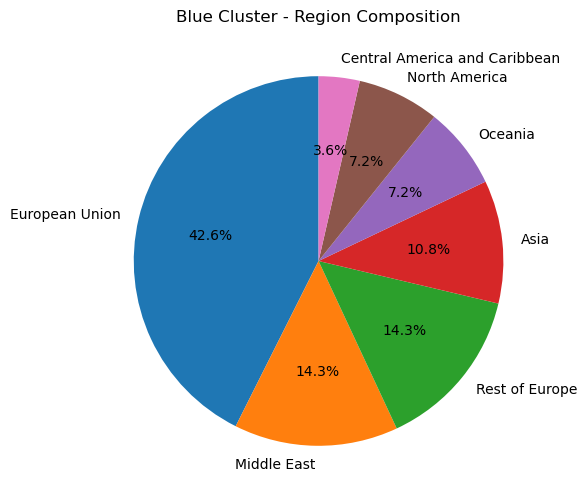

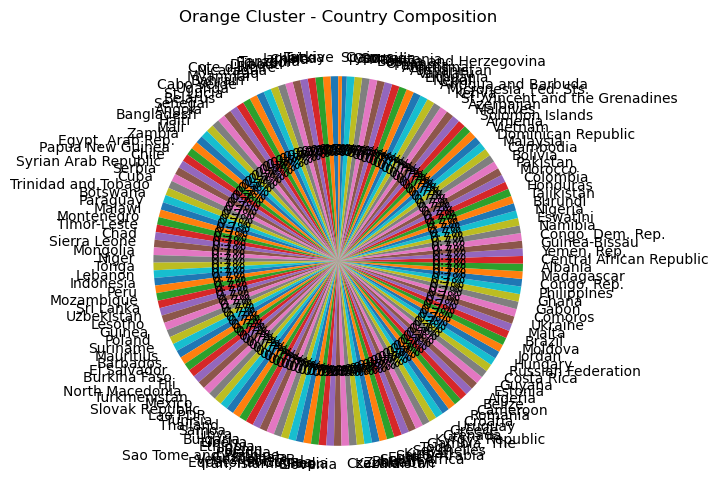

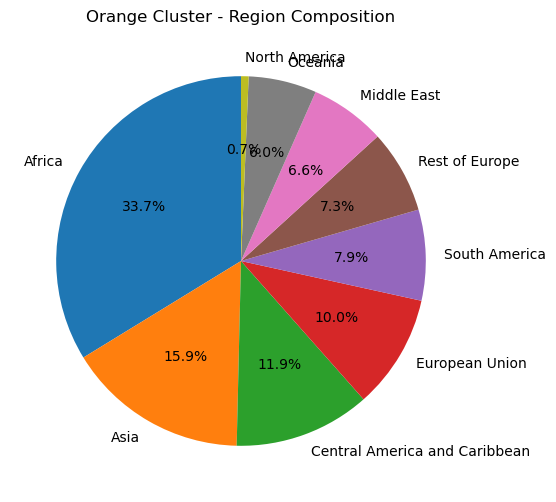

In [37]:
import matplotlib.pyplot as plt

# Create 'clusters' column for 'blue' and 'orange' clusters
df['clusters'] = kmeans.labels_

# Specify the 'cluster' column for 'blue' and 'orange' clusters
blue_group = df[df['clusters'] == 0]
orange_group = df[df['clusters'] == 1]

# Create pie chart for the 'blue' cluster's country composition
plt.figure(figsize=(6, 6))
blue_country_counts = blue_group['Country'].value_counts()
plt.pie(blue_country_counts, labels=blue_country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Blue Cluster - Country Composition')
plt.show()

# Create pie chart for the 'blue' cluster's region composition
plt.figure(figsize=(6, 6))
blue_region_counts = blue_group['Region'].value_counts()
plt.pie(blue_region_counts, labels=blue_region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Blue Cluster - Region Composition')
plt.show()

# Create pie chart for the 'orange' cluster's country composition
plt.figure(figsize=(6, 6))
orange_country_counts = orange_group['Country'].value_counts()
plt.pie(orange_country_counts, labels=orange_country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Orange Cluster - Country Composition')
plt.show()

# Create pie chart for the 'orange' cluster's region composition
plt.figure(figsize=(6, 6))
orange_region_counts = orange_group['Region'].value_counts()
plt.pie(orange_region_counts, labels=orange_region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Orange Cluster - Region Composition')
plt.show()
